In [1]:
import glob
import os
import re

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
!head data/yob1880.txt

In [3]:
path = 'data'
file_names = sorted(glob.glob(os.path.join(path, '*.txt')))
file_names

['data/yob1880.txt',
 'data/yob1881.txt',
 'data/yob1882.txt',
 'data/yob1883.txt',
 'data/yob1884.txt',
 'data/yob1885.txt',
 'data/yob1886.txt',
 'data/yob1887.txt',
 'data/yob1888.txt',
 'data/yob1889.txt',
 'data/yob1890.txt',
 'data/yob1891.txt',
 'data/yob1892.txt',
 'data/yob1893.txt',
 'data/yob1894.txt',
 'data/yob1895.txt',
 'data/yob1896.txt',
 'data/yob1897.txt',
 'data/yob1898.txt',
 'data/yob1899.txt',
 'data/yob1900.txt',
 'data/yob1901.txt',
 'data/yob1902.txt',
 'data/yob1903.txt',
 'data/yob1904.txt',
 'data/yob1905.txt',
 'data/yob1906.txt',
 'data/yob1907.txt',
 'data/yob1908.txt',
 'data/yob1909.txt',
 'data/yob1910.txt',
 'data/yob1911.txt',
 'data/yob1912.txt',
 'data/yob1913.txt',
 'data/yob1914.txt',
 'data/yob1915.txt',
 'data/yob1916.txt',
 'data/yob1917.txt',
 'data/yob1918.txt',
 'data/yob1919.txt',
 'data/yob1920.txt',
 'data/yob1921.txt',
 'data/yob1922.txt',
 'data/yob1923.txt',
 'data/yob1924.txt',
 'data/yob1925.txt',
 'data/yob1926.txt',
 'data/yob192

In [4]:
year_df = (pd.read_csv(file_name, header=None, names=['name', 'gender', 'births']).assign(file=file_name) 
           for file_name in file_names)
df = pd.concat(year_df, ignore_index=True, axis=0)

pat = re.compile(r'(\d+)')
df['year'] = df['file'].str.extract(pat, expand=False).astype(int)
df.drop('file', axis=1, inplace=True)
df.head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [5]:
df.shape

(1690784, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
name      1690784 non-null object
gender    1690784 non-null object
births    1690784 non-null int64
year      1690784 non-null int64
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [7]:
sns.set_style('white')
plt.rc('figure', figsize = (10, 8))
plt.rc('font', size=12)

### Сгруппируйте данные по полу и году и визуализируйте общую динамику рождаемости обоих полов

In [8]:
df = (df.groupby('year', as_index=False).apply(lambda x: x.assign(prop = x['births'] / x['births'].sum()))
        .reset_index(drop=True))
df.head()

,name,gender,births,year,prop
0,Mary,F,7065,1880,0.035064
1,Anna,F,2604,1880,0.012924
2,Emma,F,2003,1880,0.009941
3,Elizabeth,F,1939,1880,0.009623
4,Minnie,F,1746,1880,0.008666


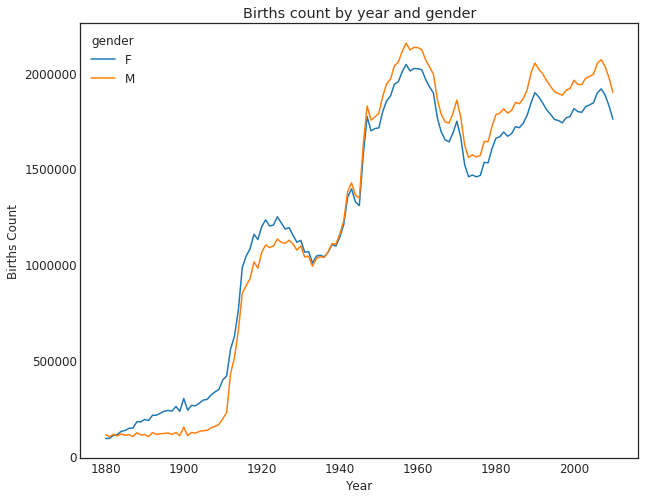

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

births_df = pd.pivot_table(df, values='births', index='year', columns='gender', aggfunc='sum')
births_df.plot(ax=ax, figsize=(10, 8))

ax.set_title('Births count by year and gender')
ax.set_xlabel('Year')
ax.set_ylabel('Births Count')

plt.show()

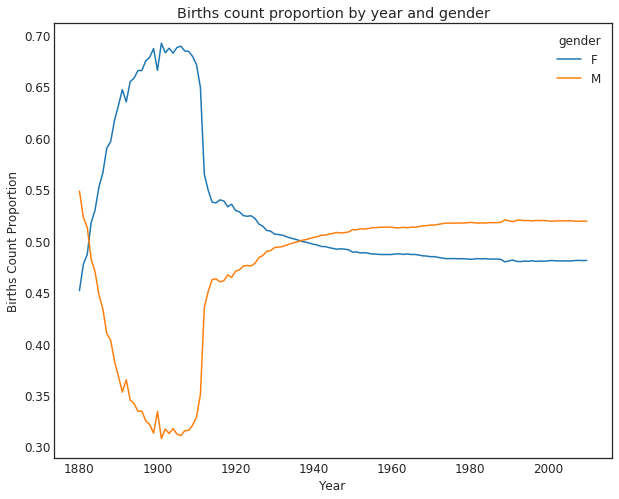

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

births_df = pd.pivot_table(df, values='prop', index='year', columns='gender', aggfunc='sum')
births_df.plot(ax=ax, figsize=(10, 8))

ax.set_title('Births count proportion by year and gender')
ax.set_xlabel('Year')
ax.set_ylabel('Births Count Proportion')

plt.show()

### Найдите самые популярные имена за всю историю

In [11]:
top_names_df = df[['name', 'gender', 'births']].groupby(['gender', 'name'], as_index=False).sum()
top_names_df.head()

,gender,name,births
0,F,Aabriella,5
1,F,Aaden,5
2,F,Aadhya,56
3,F,Aadi,5
4,F,Aadison,6


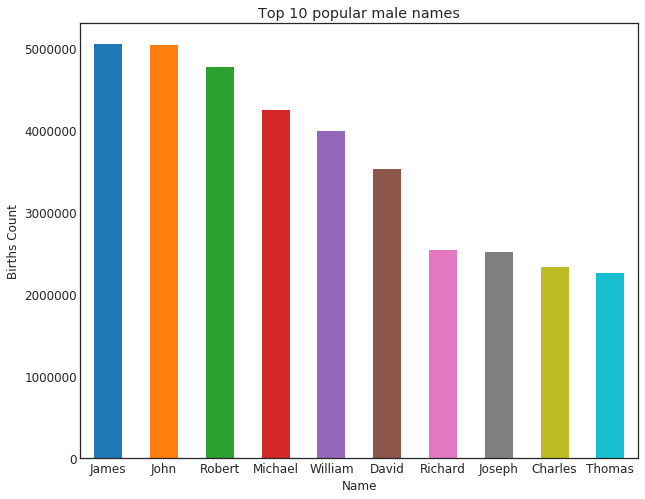

In [12]:
top_male_names_df = top_names_df[top_names_df['gender'] == 'M'].sort_values('births', ascending=False)
ax = top_male_names_df.head(10).plot.bar('name', 'births', rot=0, legend=False)
ax.set_title('Top 10 popular male names')
ax.set_xlabel('Name')
ax.set_ylabel('Births Count')

plt.show()

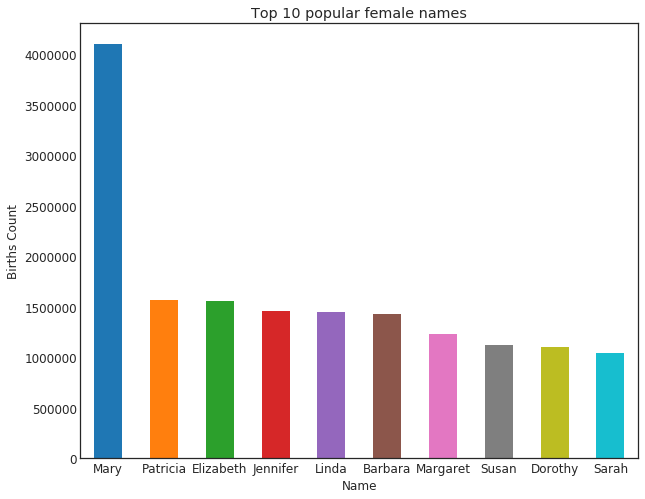

In [13]:
top_female_names_df = top_names_df[top_names_df['gender'] == 'F'].sort_values('births', ascending=False)
ax = top_female_names_df.head(10).plot.bar('name', 'births', rot=0, legend=False)
ax.set_title('Top 10 popular female names')
ax.set_xlabel('Name')
ax.set_ylabel('Births Count')

plt.show()

### Разбейте весь временной промежуток в данных на 10 частей и для каждой найдите самое популярное имя каждого пола. Для каждого найденного имени визуализируйте его динамику за все время

In [14]:
males_df = df[df['gender'] == 'M']
periods = pd.cut(males_df['year'], 10, precision=0)
top_male_names_df = males_df.loc[males_df['births'].groupby(periods).idxmax()]
top_male_names = top_male_names_df['name'].sort_values().unique()
top_male_names

array(['James', 'John', 'Michael', 'Robert'], dtype=object)

In [15]:
females_df = df[df['gender'] == 'F']
periods = pd.cut(females_df['year'], 10, precision=0)
top_female_names_df = females_df.loc[females_df['births'].groupby(periods).idxmax()]
top_female_names = top_female_names_df['name'].sort_values().unique()
top_female_names

array(['Emily', 'Jennifer', 'Jessica', 'Linda', 'Lisa', 'Mary'], dtype=object)

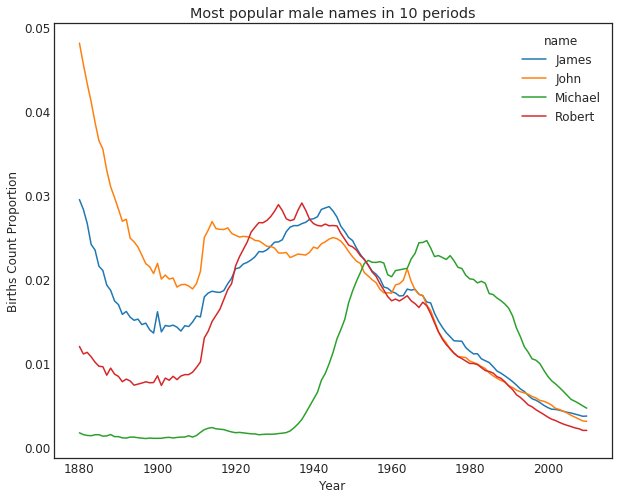

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

births_df = pd.pivot_table(df, values='prop', index='year', columns='name', aggfunc='sum')

births_df[top_male_names].plot(ax=ax, figsize=(10, 8))

ax.set_title('Most popular male names in 10 periods')
ax.set_xlabel('Year')
ax.set_ylabel('Births Count Proportion')

plt.show()

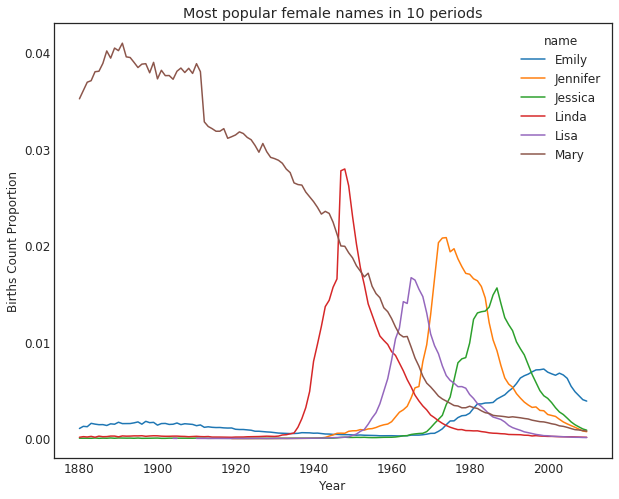

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

births_df = pd.pivot_table(df, values='prop', index='year', columns='name', aggfunc='sum')

births_df[top_female_names].plot(ax=ax, figsize=(10, 8))

ax.set_title('Most popular female names in 10 periods')
ax.set_xlabel('Year')
ax.set_ylabel('Births Count Proportion')

plt.show()

### Для каждого года рассчитайте сколько имен покрывают 50% людей, визуализируйте (мы увидим разнообразие имен за каждый год)

In [18]:
def get_quantile(group, q=0.5):
    group = group.sort_values('prop', ascending=False)
    return group['prop'].cumsum().values.searchsorted(0.5) + 1

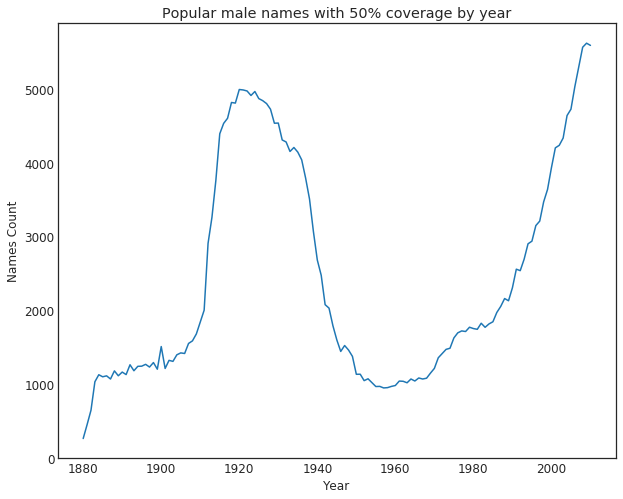

In [19]:
coverage = males_df.groupby('year').apply(get_quantile)
ax = coverage.plot()

ax.set_title('Popular male names with 50% coverage by year')
ax.set_xlabel('Year')
ax.set_ylabel('Names Count')

plt.show()

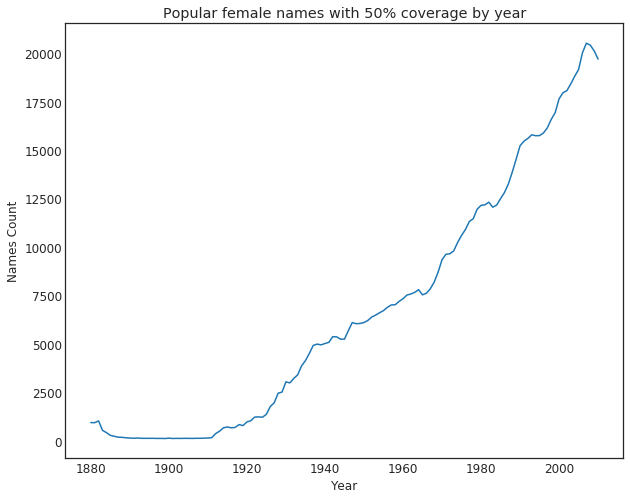

In [20]:
coverage = females_df.groupby('year').apply(get_quantile)
ax = coverage.plot()

ax.set_title('Popular female names with 50% coverage by year')
ax.set_xlabel('Year')
ax.set_ylabel('Names Count')

plt.show()

### Выберите 4 года из всего промежутка и отобразите для каждого года распределение по первой букве в имени, по последней букве в имени

In [21]:
years = np.linspace(df['year'].min(), df['year'].max(), num=4).round(0)
years

array([ 1880.,  1923.,  1967.,  2010.])

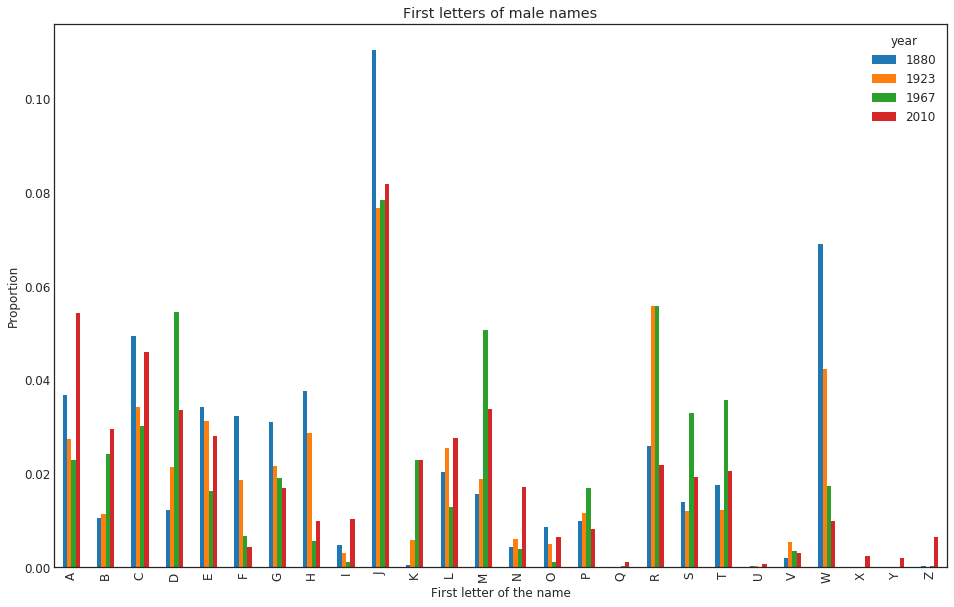

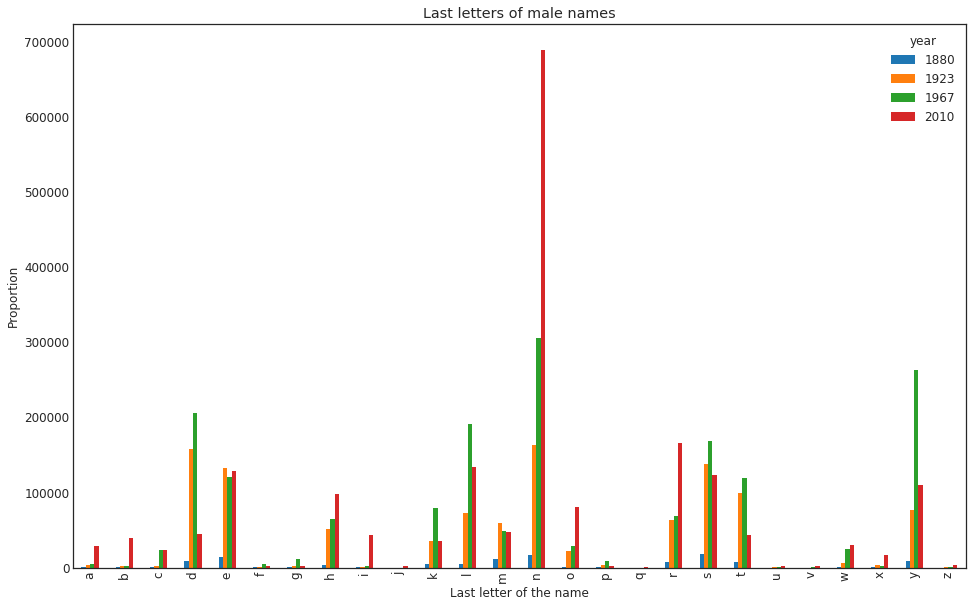

In [22]:
male_years_df = males_df[males_df['year'].isin(years)]

first_letters = male_years_df['name'].map(lambda x: x[0])
first_letters_df = male_years_df.pivot_table(values='prop', index=first_letters,
                                        columns='year', aggfunc=sum)
ax = first_letters_df.plot.bar(figsize=(16, 10))

ax.set_title('First letters of male names')
ax.set_xlabel('First letter of the name')
ax.set_ylabel('Proportion')

plt.show()

last_letters = male_years_df['name'].map(lambda x: x[-1])
last_letters_df = male_years_df.pivot_table(values='births', index=last_letters,
                                        columns='year', aggfunc=sum)
ax = last_letters_df.plot.bar(figsize=(16, 10))

ax.set_title('Last letters of male names')
ax.set_xlabel('Last letter of the name')
ax.set_ylabel('Proportion')

plt.show()

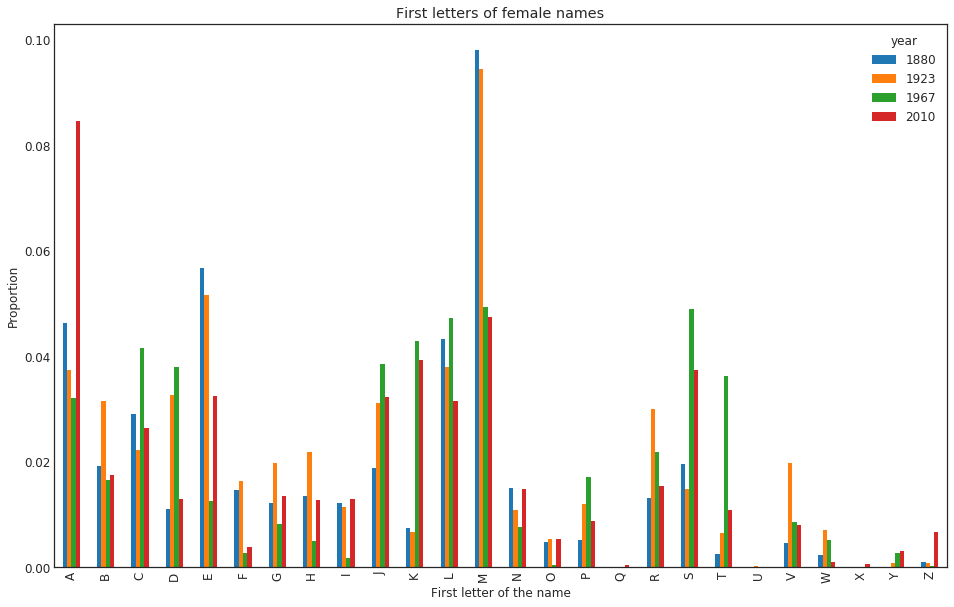

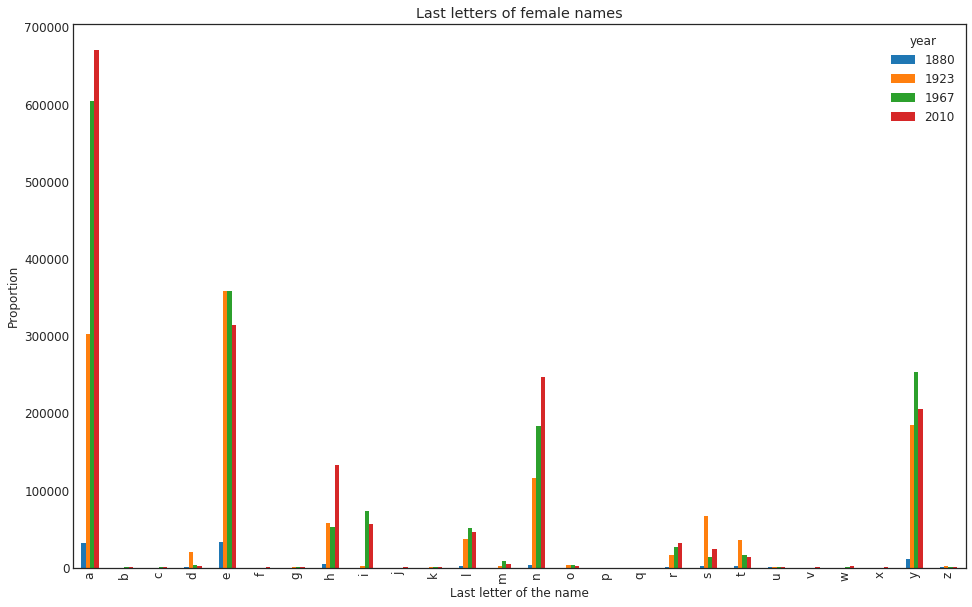

In [23]:
female_years_df = females_df[females_df['year'].isin(years)]

first_letters = female_years_df['name'].map(lambda x: x[0])
first_letters_df = female_years_df.pivot_table(values='prop', index=first_letters,
                                        columns='year', aggfunc=sum)
ax = first_letters_df.plot.bar(figsize=(16, 10))

ax.set_title('First letters of female names')
ax.set_xlabel('First letter of the name')
ax.set_ylabel('Proportion')

plt.show()

last_letters = female_years_df['name'].map(lambda x: x[-1])
last_letters_df = female_years_df.pivot_table(values='births', index=last_letters,
                                        columns='year', aggfunc=sum)
ax = last_letters_df.plot.bar(figsize=(16, 10))

ax.set_title('Last letters of female names')
ax.set_xlabel('Last letter of the name')
ax.set_ylabel('Proportion')

plt.show()

### Составьте список из нескольких известных людей (президенты, певцы, актеры, киногерои) и оцените их влияние на динамику имен, постройте наглядную визуализацию

#### Замечание: данный анализ не является анализом непосредственного влияния имен известных людей на имена, данные при рождении детям, в связи со множеством факторов, которые могли также повлиять на выбор.

Для сравнения динамики имен с именами известных людей, были выбраны люди и персонажи, связанные с фильмом Титаник: 
https://en.wikipedia.org/wiki/Titanic_(1997_film)

Цель анализа - определить возможные всплески в динамике количества детей, названных именами или фамилиями людей и персонажей, связанных с фильмом Титаник, в год его выхода.

Мужские имена:
- **Leonardo**  
  Leonaro DiCaprio (актер главной мужской роли)
- **Jack**  
  Jack Dawson (персонаж главной мужской роли)
- **Cameron**  
  James Cameron (режиссер фильма)

Женские имена:
- **Kate**  
  Kate Winslet (актриса главной женской роли)
- **Rose**  
  Rose DeWitt Bukater (персонаж главной женской роли)
- **Celine**  
  Celine Dion (исполнительница главной песни фильма)

In [24]:
titanic_male_names = ['Leonardo', 'Jack', 'Cameron']
titanic_female_names = ['Kate', 'Rose', 'Celine']
events = {'Celine Dion': {'First English Album': 1990, 'Break': [2000, 2004]}, 
               'Titanic Release Date': 1997}

titanic_male_df = df[(df['gender']=='M') & (df['name'].isin(titanic_male_names))]
titanic_female_df = df[(df['gender']=='F') & (df['name'].isin(titanic_female_names))]

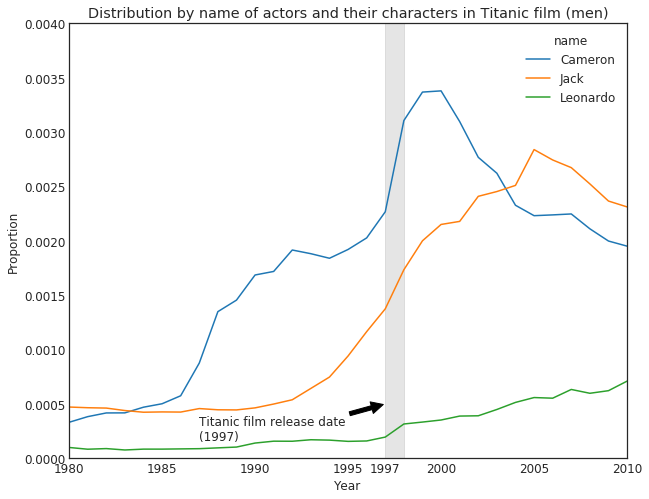

In [25]:
titanic_df = titanic_male_df.pivot_table(values='prop', index='year',columns=['name'])
ax = titanic_df.plot(xlim=[1980, 2010], ylim = [0, 0.004])

ax.set_title('Distribution by name of actors and their characters in Titanic film (men)')
ax.set_xlabel('Year')
ax.set_ylabel('Proportion')

ax.axvspan(events['Titanic Release Date'], events['Titanic Release Date'] + 1, color='grey', alpha=0.2)
ax.annotate('Titanic film release date\n(1997)', xy=(1997, 0.0005), xytext=(1987, 0.00017),
             arrowprops=dict(facecolor='black', shrink=0.05))

event_years = [1997,]
ax.set_xticks(list(set(list(ax.get_xticks()) + event_years)))

plt.show()

#### Выводы (мужские имена)
В год выхода фильма, имена актера (Leonardo), его персонажа (Jack), а также фамилия главного режиссера (Cameron) все чаще использовались при выборе имен для мальчиков. Данный рост был в общем тренде роста для всех 3 имен.

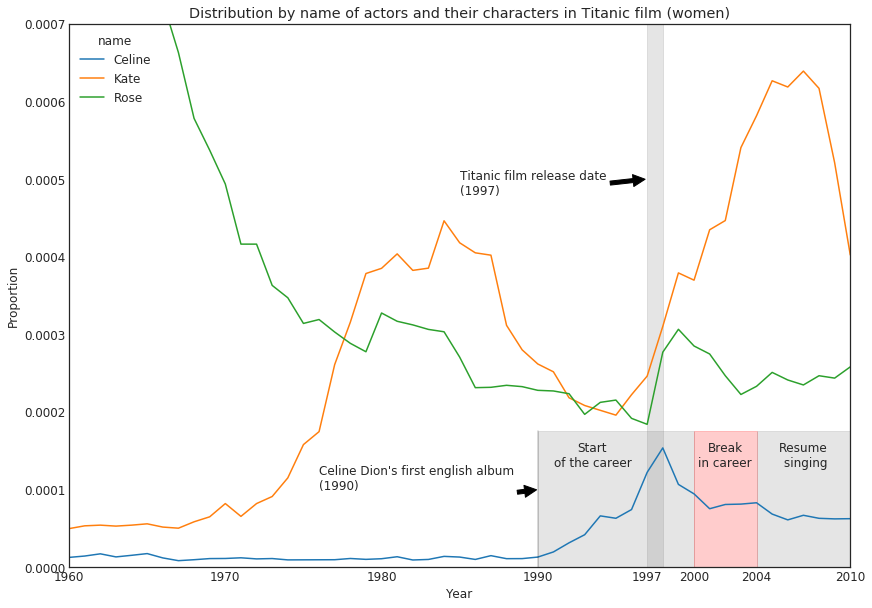

In [26]:
titanic_df = titanic_female_df.pivot_table(values='prop', index='year',columns=['name'])
ax = titanic_df.plot(xlim=[1960, 2010], ylim = [0, 0.0007], figsize=(14, 10))

ax.set_title('Distribution by name of actors and their characters in Titanic film (women)')
ax.set_xlabel('Year')
ax.set_ylabel('Proportion')

ax.axvspan(events['Titanic Release Date'], events['Titanic Release Date'] + 1, 
           color='grey', alpha=0.2)

ax.axvline(events['Celine Dion']['First English Album'], ymax=0.25, color='black', alpha=0.2)
ax.axvspan(events['Celine Dion']['First English Album'], 
           events['Celine Dion']['Break'][0], 
           ymax=0.25, color='grey', alpha=0.2)
ax.axvspan(events['Celine Dion']['Break'][0], 
           events['Celine Dion']['Break'][1],
            ymax=0.25, color='red', alpha=0.2)
ax.axvspan(events['Celine Dion']['Break'][1], 2010,
            ymax=0.25, color='grey', alpha=0.2)

ax.annotate('Titanic film release date\n(1997)', xy=(1997, 0.0005), xytext=(1985, 0.00048),
             arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate("Celine Dion's first english album\n(1990)", xy=(1990, 0.0001), xytext=(1976, 0.0001),
             arrowprops=dict(facecolor='black', shrink=0.05))
ax.text(1993.5, 0.00013, 'Start\nof the career', ha='center')
ax.text(2002, 0.00013, 'Break\nin career', ha='center')
ax.text(2007, 0.00013, 'Resume\n singing', ha='center')

event_years = [1990, 1997, 2000, 2004]
ax.set_xticks(list(set(list(ax.get_xticks()) + event_years)))

plt.show()

#### Выводы (женские имена)
В год выхода фильма, имена актера, его персонажа, а также даже фамили исполнительницы главной песни все чаще использовались при выборе имен для девочек.  
Рост использования имени актрисы (Kate) был в общем тренде, изменился общий тренд для имени персонажа (Rose), и год выхода фильма являлся последним годом роста имени исполнительницы главной песни (Celine Dion), рост популярности которой связан с выходом первого англоязычного альбома в 1990 году и совпадает с началом длительного роста использования имени Celine для девочек.